In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/QSGD_FL1/Federated-Learning-with-Model-Quantization

Mounted at /content/drive
/content/drive/MyDrive/QSGD_FL1/Federated-Learning-with-Model-Quantization


In [ ]:
# %tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import datetime

import os.path

import matplotlib.pyplot as plt
from numpy import random

np.random.seed(1)
tf.random.set_seed(1)

%matplotlib inline

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

N = 5  # Number of VSPs
L_nl = 3  # Number of UAVs in VSP
t_Sens_n = 1  # Sensing time
B_0 = 1e-6
f_n = [5, 10]  # Available CPU resource
zeta = [600, 1200]  # Data processing complexity
sigma_2 = 1e-11  # Noise variance
q = 3  # Length of packet
d_mn = [150, 200]  # Distance
p_Comm_nm = 0.5
gamma = 2.2  # Path-loss exponent
# lambdas_nm = [960 * 540, 1280 * 720, 1920 * 1080, 2560 * 1440]  # Sensing rate
lambdas_nm = [1264, 840, 392, 1296, 880, 856, 1152, 224]  # Sensing rate
W_mn = 1e7  # Bandwidth
Gamma = 1.2
gamma_ = 1.0
alpha = [0.3, 0.7]

n_A = 4
# t_Req_n = 3
d_nm = 150

import math
import random
from re import T

import time
random.seed(time.time())

def h_nm(d_nm):
    return B_0*d_nm**(-gamma)

def R_nm(d_nm):
    return W_mn*math.log2(1+(p_Comm_nm*h_nm(d_nm)/(sigma_2*Gamma)))

def Q_nm(lambda_nm):
    return lambda_nm*q*t_Sens_n

def t_Comm_nm(lambda_nm, d_nm):
    return Q_nm(lambda_nm)/R_nm(d_nm)

def t_Comp_n(zeta_, f_n_, Q_n):
    return zeta_/(f_n_*1e9)*Q_n

def t_Tot_n(t_Sens_n, t_Comm_n, t_Comp):
    t = t_Sens_n + max(t_Comm_n) + t_Comp
    return t

def valuation_n(t_Tot, t_Req, alpha_):
    if t_Tot <= t_Req:
        return 0
    return (1 + gamma_*(t_Tot - t_Req))**(1-alpha_) / (1 - alpha_)
def generate_source_U( start, end):
    _t = np.random.uniform(start, end)
    return _t
def valuation(shape,dkD,alpha):




    v = []
    poin=[]
    for row in range(shape[0]):
        tmp = []
        point = []
        for column in range(shape[1]):
            # tài nguyên
            f_k = generate_source_U(2,3)
            D_k = generate_source_U(0.5,1)
            B=10**5
            p_c_k= generate_source_U(7, 10)# w
            N_0= 10**(-9)# đổi về W
            r_k= generate_source_U(0.3,1)
            d_k = generate_source_U(0.5,1)
            gamma= 1
            q_k=generate_source_U(4,7)
            t_H_k = generate_source_U(5,10)
            tau=0.5
            k1=50
            k2=1.5
            k3=5
            k4=1.5
            beta=1
            h_k= generate_source_U(0.7,1)
            l_k = 64
            #tính g_k
            g_k= (h_k**2) / ((d_k)**(-beta))
            #print("g_k",g_k)
            #tính E_t_k
            E_train = (f_k**2)* gamma * r_k*D_k
            T_train = r_k*D_k/f_k
            #tính E_k_c
            rau=10
            C_k = B * np.log2(1 + (p_c_k * g_k) / (B*N_0 * rau))

            E_C_k = p_c_k* l_k/ C_k
            T_C_k = l_k/C_k
            #tính E_K_h
            P=1
            eta = 0.8# định ngĩa các tham số sau
            E_h_k = eta*g_k*P*t_H_k
            #tính e_k_i
            e_k_i = E_train + E_C_k
            E_0_k = 4 # tạm thời năng
            e_0 = E_h_k + E_0_k
            #tính t_k
            t_k = T_train + T_C_k
            # tính alpha
            #ti_so_quantizaton = [2,3,4,5]
            #alpha = random.choice(ti_so_quantizaton)

            #print("e_k_i",e_k_i)
            #print("t_k",t_k)
            #print("T_train",T_train)
            #print("E_train",E_train)
            #print("T_C_k",T_C_k)
            #print("C_k",C_k)
            #print("E_C_k",E_C_k)
            #print("E_h_k",E_h_k)
            #print("e_0",e_0)
            #print("=====================")


            if t_k <= tau and e_k_i <= e_0:
                 #print("ok")
                 value_i = (alpha) * (dkD) * k1**(tau - t_k) + k2**(E_h_k / E_0_k) + r_k
                 point.append(1)
            if t_k > tau and e_k_i <= e_0:
                 #print("ok==============1")
                 value_i = (alpha) * (dkD) * k3**(tau - t_k) + k4 * (E_h_k / E_0_k) + r_k
                 #poin.append(i)
                 point.append(2)
            if e_k_i > e_0:
                 #print("cut")
                 value_i = 0
                 point.append(3)

            tmp.append(value_i)

        tmp.append(1/3.0*np.max(tmp))
       # print("tmp2",tmp)
        v.append(tmp)
        poin.append(point)
        #print("v:",v)
    v = np.array(v).reshape([shape[0], shape[1]+1])

    return v,poin


In [ ]:
# %tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import datetime

import os.path

import matplotlib.pyplot as plt
from numpy import random

np.random.seed(1)
tf.random.set_seed(1)

%matplotlib inline

vc [[[3.26646703 3.53283892 3.10418934]
  [2.69809329 2.4449795  2.55357667]
  [0.         3.92981562 3.4377317 ]
  [3.32150526 2.93754053 2.99873281]
  [3.52860694 3.47175207 3.05774952]]

 [[3.44869837 3.21764298 4.09737454]
  [2.4826283  2.54492266 2.71446381]
  [3.04037949 3.50263893 3.30763116]
  [3.25820373 3.35193809 3.43498237]
  [3.82655663 4.00327795 3.44556668]]

 [[3.54182833 3.79053152 3.26348725]
  [2.86382948 2.80815193 2.39685101]
  [3.24486888 3.79291945 3.30504307]
  [3.05026764 3.43386644 3.21230597]
  [3.36204565 3.64814889 3.14301576]]

 ...

 [[3.60820387 4.04222275 3.3952341 ]
  [2.51261585 2.46673984 2.37776185]
  [3.03071242 3.81729952 2.83613902]
  [2.82669519 3.51711334 3.32524889]
  [3.80702037 3.18208354 3.56305024]]

 [[3.26143367 3.9212644  3.21266761]
  [2.72939455 2.57597288 0.        ]
  [3.59008204 2.97934701 3.4900422 ]
  [3.03818383 3.02097169 3.07143144]
  [3.37732819 3.81605024 3.94704089]]

 [[3.78235116 3.44126903 3.7196377 ]
  [2.47695185 2.929

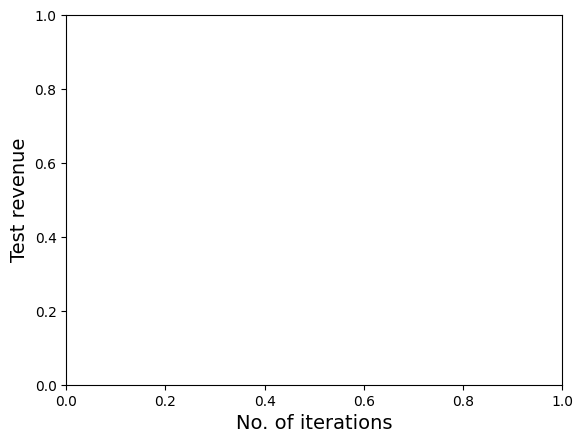

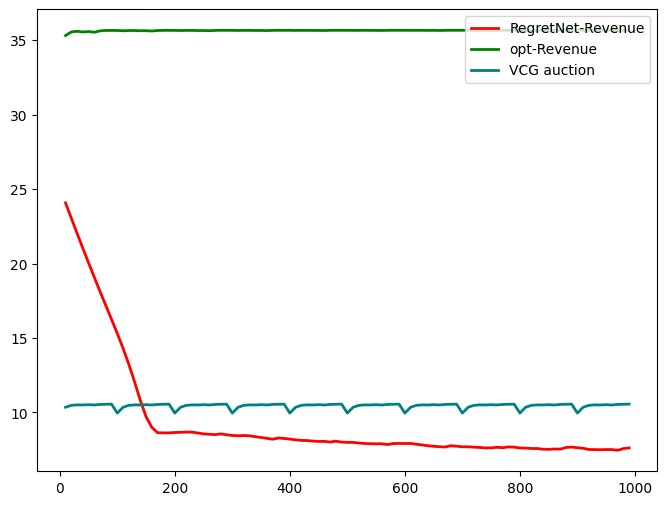

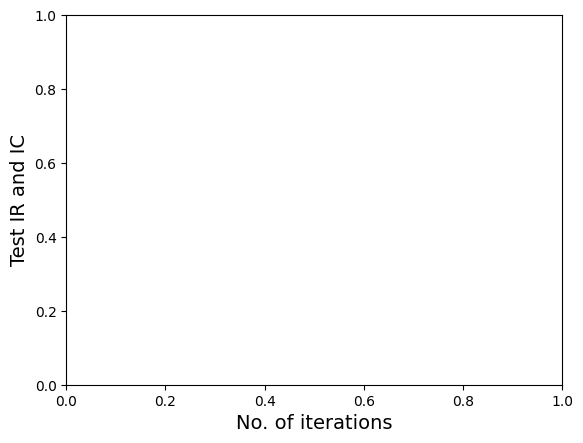

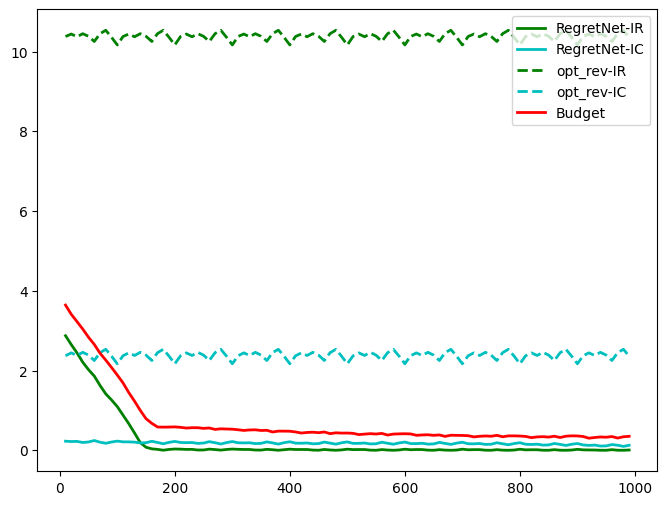

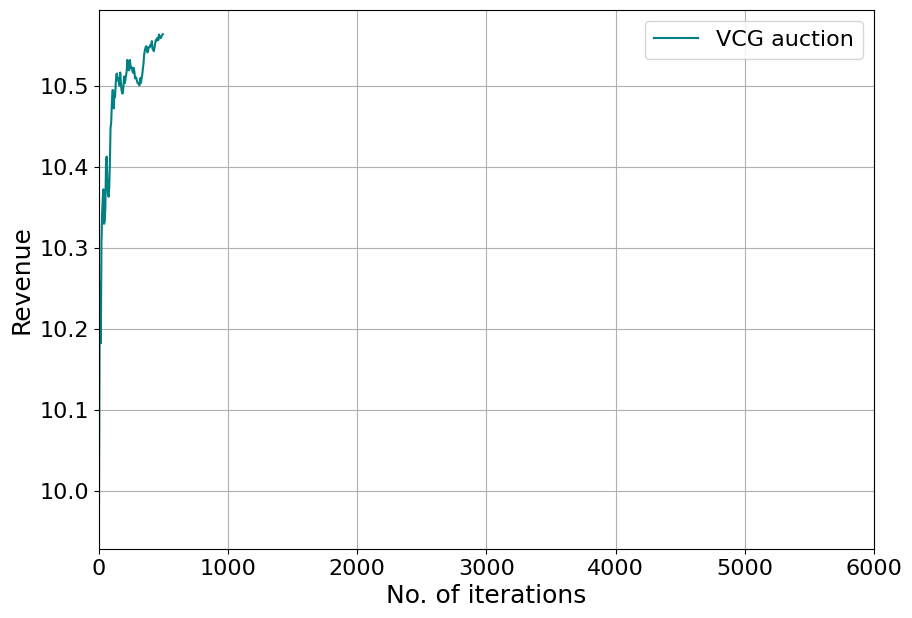

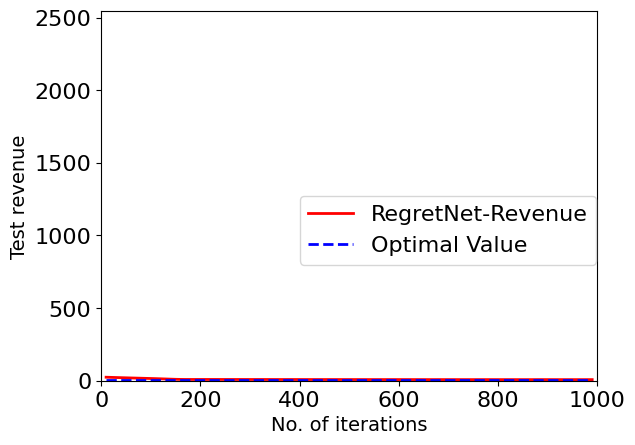

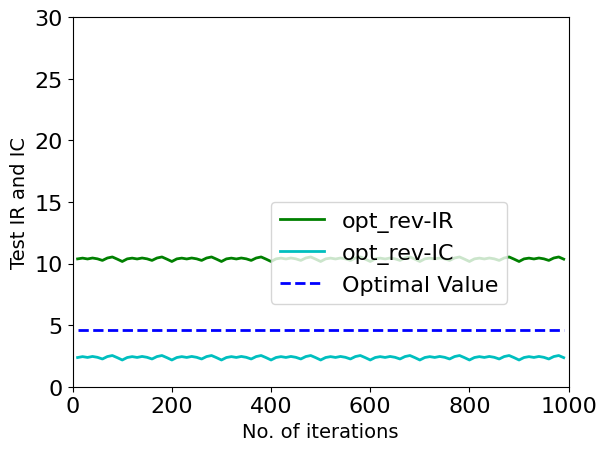

In [ ]:
import tensorflow as tf
import numpy as np
import datetime

import os.path

import matplotlib.pyplot as plt

from numpy import random
np.random.seed(1)
tf.random.set_seed(1)

def get_mini_batches(X, batch_size):
    mini_batches = [X[i:i+batch_size,:] for
                   i in range(0, len(X), batch_size)]
    return mini_batches

def weight_variable(shape):
    initial = tf.random.uniform(shape, minval=0.0,maxval=0.5)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.0, shape = shape)
    return tf.Variable(initial)

#====================================================================================
def get_allocation_ENUM1(h):
    #print("shape",h[2].shape) #(3,1)

    x=tf.concat(h,axis=0)
    #print("shape1",x.shape) #(30,1)
    x_sum = tf.reduce_sum(x,axis=0)
    #x_sum_reshaped = tf.reshape(x_sum, [tf.shape(x)[0], 1])

    g = tf.divide(x, x_sum)
    #print("g",g)
    #print("shape2",g.shape)
    #return [tf.reshape(g[i], [N_i, 1]) for i in range(len(h))]
    #return [tf.slice(g, [i*N_i, 0], [N_i, 1]) for i in range(N_b)]
    #return [tf.slice(g, [0, i], [N_i, 1]) for i in range(N_b)]
    return g


def get_payment_ENUM1(h):

    return [tf.reduce_sum(h[i]) for i in range(len(h))]

def get_ENUM1(h,ratio_data,alpha):

    g=get_allocation_ENUM1(h)
    p=get_payment_ENUM1(h)
    p_E = tf.add_n(p)

    #FOR USER
    # Tạo tensor rỗng A
    irp_ = []
    rgt = []
    u=[]

    for y in range(len(h)):
      #FOR USER 1
      #irp
      x=h[y]
      a=[]
      b=[]
      u1= tf.reduce_sum(tf.multiply(g[y],x[:-1]))-p[y]
      irp_1= tf.maximum(0.0,-u1)
      irp_.append(irp_1)
      #print("len(irp_1)",irp_1.shape)
      #rgt
      u1_mis_array=[]

      for i in range(batch_size):
          h_copy=h
          #x1_mis= tf.random_uniform([N_i,1],minval=0.0,maxval=1.0)
          v1,_=valuation([1,N_i],normalized_arr[y],alpha[y])
          x1_mis = tf.convert_to_tensor(v1.reshape(-1, 1),dtype=tf.float32)
          h_copy[y]=x1_mis
          g_mis=get_allocation_ENUM1(h_copy)
          p_mis= get_payment_ENUM1(h_copy)
          u1_mis= tf.reduce_sum(tf.multiply(g_mis[y],x1_mis[:-1])) - p_mis[y]
          u1_mis_array.append(u1_mis)
      h_copy[y]= x
      #print("Hemun",h[y])
      u1_max = tf.reduce_max(u1_mis_array)
      rgt_1 = u1_max-u1
      rgt.append(rgt_1)
    #print("len(irp_)",len(irp_))

    return p_E, irp_, rgt
#====================================================================
def get_payment1(h,W_p1,W_p2,W_p3):

    x=tf.concat(h,axis=0)
    c_1= tf.nn.sigmoid(tf.matmul(W_p1,x)) # 10x4 x 4x1 =[10,1]
    c_2= tf.nn.sigmoid(tf.matmul(W_p2,c_1)) #[10,10] x[10,1] =[10,1]
    s_= tf.matmul(W_p3,c_2)  # [2,10] x [10,1]= [2,1]
    p= tf.nn.relu(s_)   #[2,1]
    #print("hget_payment1",h)

    return [p[i, 0] for i in range(N_b)]
    #return tf.squeeze(p)  # Squeeze để loại bỏ các chiều có kích thước là 1


def get_allocation1(h,W_g1,W_g2,W_g3):

    # print('get_allocation:', x1, x2, x3, x4, x5)
    x=tf.concat(h,axis=0)

    h_1= tf.nn.sigmoid(tf.matmul(W_g1,x))  # [10,1]
    h_2= tf.nn.sigmoid(tf.matmul(W_g2,h_1)) # [10,1]
    s1= tf.matmul(W_g3,h_2)   # [4,1] [s11,s12,s21,s22]
    s2=tf.reshape(s1,[N_b,N_i])   # 3 is bidders, 2 is items
    s3=tf.transpose(s2)
    zeros=tf.zeros([N_i,1],dtype=tf.float32)   #     [0.0,0.0]
    s_add_zeros= tf.concat([s3,zeros], axis=1)

    g= tf.nn.softmax(s_add_zeros) # [z11,z12] [2,1]
    #print("hget_allocation1",h)

    return [tf.slice(g, [0, i], [N_i, 1]) for i in range(N_b)]
    #return tf.unstack(g, axis=0)


def get_rgt1(h,W_g1,W_g2,W_g3,W_p1,W_p2,W_p3,ratio_data,alpha):
    g=[]
    pa=[]

    g=get_allocation1(h,W_g1,W_g2,W_g3)# g là tensor 5,3,1 là cái phân bố cho 3 món hàng của từng người dùng
    pa=get_payment1(h,W_p1,W_p2,W_p3)
    h_codinh= h
    #print("h_codinh",h_codinh)
    p =tf.add_n(pa)
    bcp_ =[]
    u=[]
    irp_=[]
    irp_square=[]
    rgt_ =[]
    rgt_square=[]

    for i in range(len(h)):
      t=h_codinh[i]
      print("t",t)
      #print("h[i]",h[i])
      #print("t",t)
      bc=tf.maximum(0.0,pa[i] - t[-1])
      bcp_.append(bc)
      #print("p1 - b1: ", pa[i], t[-1])

      #irp
      ua=tf.reduce_sum(tf.multiply(g[i],t[:-1]))-pa[i]
      u.append(ua)# Coong thức tính pi(i)
      irp1=tf.maximum(0.0,-ua)
      irp_.append(irp1)
      irpS= tf.square(irp1)
      irp_square.append(irpS)

      #rgt
      u_mis_array=[]

      for y in range(batch_size):
          h_copy=h
          #print("vào mini batch")
          #print("h_copy",h_copy)
          #x1_mis= tf.random_uniform([N_i,1],minval=0.0,maxval=1.0)
          v, _ = valuation([1,N_i],normalized_arr[i],alpha[i])
          x_mis = tf.convert_to_tensor(v.reshape(-1, 1),dtype=tf.float32)
          #print("h[i]",h[i])
          h_copy[i] = x_mis
          #print("h[i]",h[i])
          # print('get_rgt '+str(i)+': ', x1_mis, x2, x3, x4, x5)

          g_mis=get_allocation1(h_copy,W_g1,W_g2,W_g3)
          p_mis= get_payment1(h_copy,W_p1,W_p2,W_p3)
          u_mis= tf.reduce_sum(tf.multiply(g_mis[i],x_mis[:-1])) - p_mis[i]
          #print("u_mis",u_mis)
          u_mis_array.append(u_mis)
      h_copy[i] = t
      u_max = tf.reduce_max(u_mis_array)
      rgt1=u_max-ua
      rgt_.append(rgt1)
      rgtS=tf.square(rgt1)
      rgt_square.append(rgtS)

    return p, irp_, irp_square, rgt_, rgt_square,bcp_

def get_references(h):
    s=[]
    s.append(tf.reshape(h[i],[1,N_i+1]) for i in range(len(h)))
    x_vector = tf.concat(h,axis=1)
    [values, indices] = tf.nn.top_k(x_vector,3)# tính trung bình 3 giá trị top đầu
    enum= tf.reduce_sum(values)

    return enum
# Hàm tạo placeholder
def create_placeholder():
    return tf.compat.v1.placeholder(tf.float32, [N_i + 1, 1])
#=========================================================================================================
def VCG(v,N=5, L_nl=3):
    Revenue = []
    for i in range (v.shape[0]//N):
        pay = 0.0
        for j in range(L_nl):
            tmp = v[i*N:(i+1)*N, j]
            #print(tmp)
            pay += np.sort(tmp)[-2]
            #print(np.sort(tmp)[-2])
        Revenue.append(pay)
        # Save Revenue to a text file with a specific path
        #print("pay = ", pay)
    file_path = '/content/drive/MyDrive/QSGD_FL1/Federated-Learning-with-Model-Quantization/result_2/VCG/Revenue_VCG_1.txt'
    np.savetxt(file_path, Revenue)
    return Revenue

def smoothing_mean(data):
    result = []
    for i in range(len(data)):
        result.append(np.mean(data[:i+1]))
    return result



K =5
J = 20 # neurals
N_b=5 # bidders
N_i=3# Items
batch_size = 20

#pro=150
A_Q = 1.0

pro = 1.0
#pro = .5
y_= 4.63
N_pro=100


# N_iter= 10000#100000
N_iter= 1000

N_prin=10
#learning_rate = 0.004 good for T=2.0, 3.0, c= [0.8,0.9]
#learning_rate = 0.004
learning_rate = 0.001
learning_rate_sgd=0.001
train_thresold=N_iter

#parameters for blockchain
#T= 2.5
T= 2.0
r= 0.007
la = 600
epsi = 1
s_min = 0
s_max = 500


lamda_init =1.0   #1.10 lower, 1.018 upper
lamda_init_rgt =1.0
lamda_irp=[]
lamda_rgt=[]
#Save results
iter_array=[]
loss_array=[]
irp_array=[]
rgt_array=[]
opt_array=[]
bcp_array=[]
irp_array_ENUM=[]
rgt_array_ENUM=[]

#Weight matrix for allocation
a_g1= weight_variable([J,N_b*(N_i+1)])
a_g2= weight_variable([J,J])
a_g3 = weight_variable([N_b*N_i,J])

#Weight matrix for payment

a_p1 = weight_variable([J,N_b*(N_i+1)])
a_p2 = weight_variable([J,J])
a_p3 = weight_variable([N_b,J])
#============================tạo tỉ lệ data và quatbit=======================================================
all_users_quant_levels = [128, 32, 64]
ratios = [0.7, 0.1, 0.2]

# Tạo mảng mới dữ liệu
random_array = np.random.randint(20,28, size=N_b)
total = np.sum(random_array)
ratio_data = random_array / total
normalized_arr = ratio_data
#print("ratio_data: ", ratio_data)

# Tạo mảng mới quant_level theo tỉ lệ
array_quant_level = np.random.choice(all_users_quant_levels, N_b, p=ratios)
#print("array_quant_level: ",array_quant_level)
#print("array_quant_level: ",len(array_quant_level))
min_quant = min(array_quant_level)
alpha = [quant / min_quant for quant in array_quant_level]
#print("v0:", v0[1])
v0=[]
p0=[]
va=[]
for i in range(N_b):
  v,p = valuation([N_pro, N_i],normalized_arr[i],alpha[i])
  v0.append(v)
  p0.append(p)
  v_without_last_column = v[:, :-1]
  va.append(v_without_last_column)
# Sử dụng hàm concatenate để ghép các mảng
vc = np.concatenate([arr[:, np.newaxis] for arr in va], axis=1)
print("vc",vc)
print("len(vc)",len(vc))
vl=vc[0]
print("len(vc)",len(vl))
# Chuyển từ mảng 3D thành mảng 2D
array_2d = vc.reshape(-1, vc.shape[-1])
print("array_2d",array_2d)
#==============================chạy VCG============================================
Revenue = VCG(array_2d,N_b,N_i)
Revenue = smoothing_mean(Revenue)
Rev_new=[]
print("len(Revenue)",len(Revenue))
print("Revenue",Revenue)
a = int(N_iter/N_pro)
Rev_new= np.tile(Revenue, a)# a phải nguyên đây chỉ lặp lại revenue thoi



#==========================Lưu các tham số ra file========================================
# Đường dẫn tới thư mục
folder_path = '/content/drive/MyDrive/QSGD_FL1/Federated-Learning-with-Model-Quantization/tham_số_từ_model_bid/'

# Lấy danh sách tất cả các file trong thư mục
file_list = os.listdir(folder_path)

# Xóa từng file
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)

file_names = [f'v{i}.npy' for i in range(N_b)] + [f'p{i}.npy' for i in range(N_b)]
file_names += ['ratio_data.npy', 'array_quant_level.npy']

# Tạo và lưu các file trống
for file_name in file_names:
    # Đường dẫn đầy đủ đến file
    file_path = os.path.join(folder_path, file_name)

    # Tạo file trống (đặt dữ liệu là mảng rỗng)
    np.save(file_path, np.array([]))

    #print(f"Đã tạo và lưu {file_name} trong {folder_path}")

for i in range(0, N_b):
    np.save(os.path.join(folder_path, f'v{i}.npy'), v0[i])
    np.save(os.path.join(folder_path, f'p{i}.npy'), p0[i])

np.save(os.path.join(folder_path, 'ratio_data.npy'), ratio_data)
np.save(os.path.join(folder_path, 'array_quant_level.npy'), array_quant_level)
#=============================tạo các tham số, biến cho chạy mô hình===================================
# Model input and output
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Tạo danh sách placeholders từ x1 đến x5
x0=[]
h = [tf.compat.v1.placeholder(tf.float32, [N_i+1, 1]) for _ in range(N_b)]
for i in range(N_b):
  a= tf.compat.v1.placeholder(tf.float32, [N_i+1, 1])
  x0.append(a)

payment, irp, irp_S, rgt, rgt_S, bcp =get_rgt1(x0,a_g1,a_g2,a_g3,a_p1,a_p2,a_p3,normalized_arr,alpha)
p_E, irp_ENUM, rgt_ENUM = get_ENUM1(x0,normalized_arr,alpha)
ENUM=get_references(x0)


revenue= tf.reduce_mean(payment)
IRP_MEAN = (1.0/N_b)*(tf.add_n(irp))
RGT_MEAN = (1.0/N_b)*(tf.add_n(rgt))
BCP_MEAN = (1.0/N_b)*(tf.add_n(bcp))
IRP_MEAN_ENUM = (1.0/N_b)*(tf.add_n(irp_ENUM))
RGT_MEAN_ENUM = (1.0/N_b)*(tf.add_n(rgt_ENUM))

user=[]
for i in range(N_b):
  lamda_irp.append(lamda_init)
  lamda_rgt.append(lamda_init_rgt)
  user.append(lamda_irp[i]*irp[i] + (pro/2)*irp_S[i] + lamda_rgt[i]*rgt[i] + (pro/2)*rgt_S[i])
  lamda_irp[i] = lamda_irp[i] - pro*irp[i]
  lamda_rgt[i]= lamda_rgt[i] - pro*rgt[i]

irp_rgt_total = tf.add_n(user)

budgets = tf.add_n(bcp)
#

loss= -1*revenue + 1.69*irp_rgt_total + budgets
c = [val for pair in zip(lamda_irp, lamda_rgt) for val in pair]

IR_Ps = []
RT_Ps = []
REVs  = []
BCPs = []
IR_Ps_ENUM = []
RT_Ps_ENUM = []
ENUM_REVE=[]
Rev_new1=[]
ENUM_REV = 0.0

#optimizer = tf.train.GradientDescentOptimizer(learning_rate) #adam 0.0001
#optimizer = tf.train.AdamOptimizer(0.0009) #adam 0.002 OK
#optimizer = tf.train.AdamOptimizer(learning_rate) #adam
#train = optimizer.minimize(loss)

optimizer = tf.train.AdamOptimizer(learning_rate) #adam
train = optimizer.minimize(loss)

optimizer_gd = tf.train.GradientDescentOptimizer(learning_rate_sgd) #adam 0.0001
train_gd = optimizer_gd.minimize(loss)


## training loop
#==========================vào quá trình chạy=========================================
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(N_iter):
    z0=[]
    for t in range(N_b):
      vp = v0[t]
      z= np.reshape(vp[np.mod(i,N_pro),:],[N_i+1,1])
      z0.append(z)
    #print("z0",z0)
    feed_dict = {x: v for x, v in zip(x0, z0)}
    #print("feed_dict",feed_dict)
    #print("x0[0]",x0[0])


    #sess.run(train, {x1: z1, x2 : z2, x3 : z3, x4 : z4, x5 : z5})
    if i<train_thresold:
        sess.run(train, feed_dict)
    else:
        sess.run(train_gd, feed_dict)

    sess.run(c, feed_dict)

    IR_Ps.append(sess.run(IRP_MEAN, feed_dict))
    RT_Ps.append(sess.run(RGT_MEAN, feed_dict))
    BCPs.append(sess.run(BCP_MEAN, feed_dict))
    REVs.append(sess.run(revenue,   feed_dict))
    IR_Ps_ENUM.append(sess.run(IRP_MEAN_ENUM, feed_dict))
    RT_Ps_ENUM.append(sess.run(RGT_MEAN_ENUM, feed_dict))


    ENUM_REV+= sess.run(ENUM, feed_dict)
    ENUM_REV_AVER = ENUM_REV/(i+1)
    a=Rev_new[i]


    if i%N_prin==0 and len(IR_Ps)>N_prin:

        IR_P = sum(IR_Ps[-N_prin:])/len(IR_Ps[-N_prin:])
        RT_P = sum(RT_Ps[-N_prin:])/len(RT_Ps[-N_prin:])
        BCP = sum(BCPs[-N_prin:])/len(BCPs[-N_prin:])
        l = sum(REVs[-N_prin:])/len(REVs[-N_prin:])
        IR_P_ENUM = sum(IR_Ps_ENUM[-N_prin:])/len(IR_Ps_ENUM[-N_prin:])
        RT_P_ENUM = sum(RT_Ps_ENUM[-N_prin:])/len(RT_Ps_ENUM[-N_prin:])


        print(i, "{:.4f}".format(l), "IR=", "{:.6f}".format(IR_P), "IC=", "{:.6f}".format(RT_P), "BCP=","{:.6f}".format(BCP[0]))
        print(i, "{:.4f}".format(float(ENUM_REV_AVER)), "IR=", "{:.6f}".format(IR_P_ENUM), "IC=", "{:.6f}".format(RT_P_ENUM))

        #print("ENUM_REV = ",[i,float(ENUM_REV_AVER)])


        iter_array.append(i)
        loss_array.append(float(l.item()))
        irp_array.append(float(IR_P.item()))
        rgt_array.append(float(RT_P.item()))
        bcp_array.append(float(BCP[0].item()))
        irp_array_ENUM.append(float(IR_P_ENUM.item()))
        rgt_array_ENUM.append(float(RT_P_ENUM.item()))
        ENUM_REVE.append(float(ENUM_REV_AVER.item()))
        Rev_new1.append(a)

        opt_array.append(y_)

iters = [N_b*i for i in range (N_pro)]
iters[:N_b]

plt.xlabel('No. of iterations',fontsize=14)
plt.ylabel('Test revenue',fontsize=14)
plt.figure(figsize=(8, 6))
plt.plot(iter_array,loss_array,"r", linewidth=2,label="RegretNet-Revenue")
plt.plot(iter_array,ENUM_REVE,"g", linewidth=2,label="opt-Revenue")
plt.plot(iter_array, Rev_new1, "teal" ,linewidth=2, label="VCG auction")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper right', fontsize='medium')
plt.show()



plt.xlabel('No. of iterations', fontsize=14)
plt.ylabel('Test IR and IC', fontsize=14)
# Đặt tỉ lệ khung nhìn của đồ thị
plt.figure(figsize=(8, 6))
# Vẽ đồ thị
plt.plot(iter_array, irp_array, "g", linewidth=2, label="RegretNet-IR")
plt.plot(iter_array, rgt_array, "c", linewidth=2, label="RegretNet-IC")
plt.plot(iter_array, irp_array_ENUM, "g--", linewidth=2, label="opt_rev-IR")
plt.plot(iter_array, rgt_array_ENUM, "c--", linewidth=2, label="opt_rev-IC")
plt.plot(iter_array, bcp_array, "r", linewidth=2, label="Budget")
# Thêm chú thích
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper right', fontsize='medium')
# Hiển thị đồ thị
plt.show()


iters = [N_b*i for i in range (N_pro)]
iters[:N_b]
# %%

start = 0
plt.figure(figsize=(10, 7))
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
LABEL_SIZE = 18
# axis_font = {'fontname':'Arial', 'size':LABEL_SIZE}
axis_font = {'size':LABEL_SIZE}

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)
plt.grid(True)

plt.plot(iters, Revenue[:N_pro], '-', color='teal' , label="VCG auction", linewidth=1.5)
plt.legend(loc='best')
# plt.legend(loc='upper left', bbox_to_anchor=(0.18,0.9875))
plt.xlim([0, 6000])
# plt.ylim([24.5, 40)]
plt.xlabel('No. of iterations', **axis_font)
plt.ylabel('Revenue', **axis_font)

#%%
plt.show()

# %%
plt.xlabel('No. of iterations',fontsize=14)
plt.ylabel('Test revenue',fontsize=14)
#plt.title('Continuous uniform-U[0,1]')
plt.plot(iter_array,loss_array,"r", linewidth=2,label="RegretNet-Revenue")
plt.plot(iter_array,opt_array, "b--", linewidth=2,label="Optimal Value")
plt.axis([0, N_iter, 0.0, 2544.0])
plt.legend(bbox_to_anchor=(0.4, 0.5), loc=2, borderaxespad=0.)
plt.show()


plt.xlabel('No. of iterations',fontsize=14)
plt.ylabel('Test IR and IC',fontsize=14)
#plt.title('Continuous uniform-U[0,1]')
#plt.plot(iter_array,loss_array,"r", linewidth=2,label="RegretNet-Revenue")
plt.plot(iter_array,irp_array_ENUM,"g", linewidth=2,label="opt_rev-IR")
plt.plot(iter_array,rgt_array_ENUM,"c", linewidth=2,label="opt_rev-IC")
plt.plot(iter_array,opt_array, "b--", linewidth=2,label="Optimal Value")
plt.axis([0, N_iter, 0.0, 30.0])
plt.legend(bbox_to_anchor=(0.4, 0.5), loc=2, borderaxespad=0.)
plt.show()



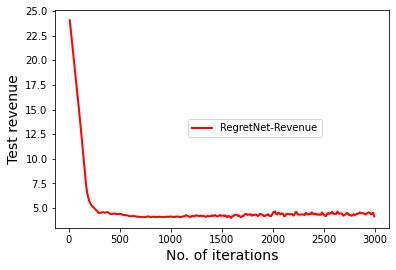

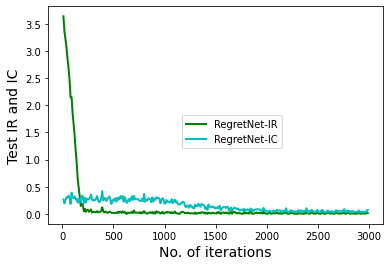

In [ ]:
plt.xlabel('No. of iterations',fontsize=14)
plt.ylabel('Test revenue',fontsize=14)
#plt.title('Continuous uniform-U[0,1]')
plt.plot(iter_array,loss_array,"r", linewidth=2,label="RegretNet-Revenue")
#plt.plot(iter_array,irp_array,"g", linewidth=2,label="RegretNet-IR")
#plt.plot(iter_array,rgt_array,"c", linewidth=2,label="RegretNet-RG")
# plt.plot(iter_array,opt_array, "b--", linewidth=2,label="Optimal Value")
# plt.axis([0, N_iter, 0.0, 25.0])
plt.legend(bbox_to_anchor=(0.4, 0.5), loc=2, borderaxespad=0.)
plt.show()


plt.xlabel('No. of iterations',fontsize=14)
plt.ylabel('Test IR and IC',fontsize=14)
#plt.title('Continuous uniform-U[0,1]')
#plt.plot(iter_array,loss_array,"r", linewidth=2,label="RegretNet-Revenue")
plt.plot(iter_array,irp_array,"g", linewidth=2,label="RegretNet-IR")
plt.plot(iter_array,rgt_array,"c", linewidth=2,label="RegretNet-IC")
# plt.plot(iter_array,opt_array, "b--", linewidth=2,label="Optimal Value")
# plt.axis([0, N_iter, 0.0, 1.0])
plt.legend(bbox_to_anchor=(0.4, 0.5), loc=2, borderaxespad=0.)
plt.show()



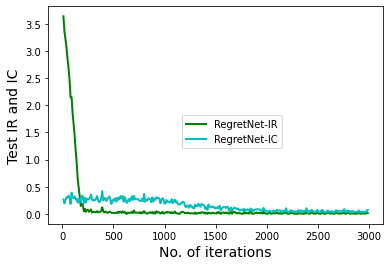

In [ ]:

plt.xlabel('No. of iterations',fontsize=14)
plt.ylabel('Test IR and IC',fontsize=14)
#plt.title('Continuous uniform-U[0,1]')
#plt.plot(iter_array,loss_array,"r", linewidth=2,label="RegretNet-Revenue")
plt.plot(iter_array,irp_array,"g", linewidth=2,label="RegretNet-IR")
plt.plot(iter_array,rgt_array,"c", linewidth=2,label="RegretNet-IC")
# plt.plot(iter_array,opt_array, "b--", linewidth=2,label="Optimal Value")
# plt.axis([0, N_iter, -0.3, 1.0])
plt.legend(bbox_to_anchor=(0.4, 0.5), loc=2, borderaxespad=0.)
plt.show()

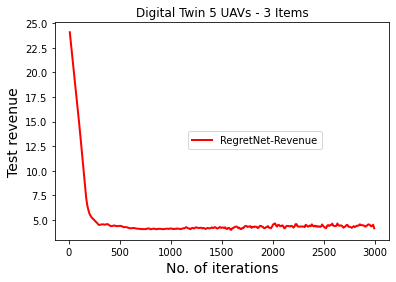

In [ ]:
plt.xlabel('No. of iterations',fontsize=14)
plt.ylabel('Test revenue',fontsize=14)
plt.title('Digital Twin 5 UAVs - 3 Items')
#plt.title('Continuous uniform-U[0,1]')
plt.plot(iter_array,loss_array,"r", linewidth=2,label="RegretNet-Revenue")
#plt.plot(iter_array,irp_array,"g", linewidth=2,label="RegretNet-IR")
#plt.plot(iter_array,rgt_array,"c", linewidth=2,label="RegretNet-RG")
# plt.plot(iter_array,opt_array, "b--", linewidth=2,label="Optimal Value")
# plt.axis([0, N_iter, 25.0, 40.0])
plt.legend(bbox_to_anchor=(0.4, 0.5), loc=2, borderaxespad=0.)
plt.savefig('Digital Twin 5 UAVs - 3 Items.png')
plt.show()


# plt.xlabel('No. of iterations',fontsize=14)
# plt.ylabel('Test IR and IC',fontsize=14)
# #plt.title('Continuous uniform-U[0,1]')
# #plt.plot(iter_array,loss_array,"r", linewidth=2,label="RegretNet-Revenue")
# plt.plot(iter_array,irp_array,"g", linewidth=2,label="RegretNet-IR")
# plt.plot(iter_array,rgt_array,"c", linewidth=2,label="RegretNet-IC")
# plt.plot(iter_array,opt_array, "b--", linewidth=2,label="Optimal Value")
# plt.axis([0, N_iter, 0.0, 1.0])
# plt.legend(bbox_to_anchor=(0.4, 0.5), loc=2, borderaxespad=0.)
# plt.show()


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# import os
# os.chdir("drive/My Drive/Do_an_lien_nganh/Metaverse_edge_computing_machine_learning")
# !ls
np.savetxt('Revenue_DT_with_Semantic_Budgets.txt', loss_array)
np.savetxt('IR_lamda_with_Semantic_DT_Budgets.txt', irp_array)
np.savetxt('IC_lamda_with_Semantic_DT_Budgets.txt', rgt_array)
np.savetxt('Budgets_with_Semantic_DT.txt', bcp_array)

np.savetxt('iter_array_DT.txt', iter_array)

In [ ]:
np.mean(loss_array[-100:])

4.403214510202408